# Salient Object Detection Applying Deep Learning Framework

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model = "frozen_inference_graph.pb"

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
classLabels =[]
file_name = "labels.txt"
with open(file_name, "rt") as fpt:
    classLabels = fpt.read().rstrip("\n").split("\n")

In [6]:
classLabels

['person',
 'Rickshaw',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [7]:
print(len(classLabels))

80


In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 00000272D45562D0>

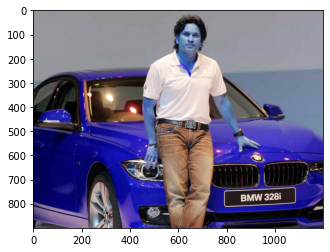

In [9]:
img =cv2.imread("Car_tendulkar.jpg")
plt.imshow(img)

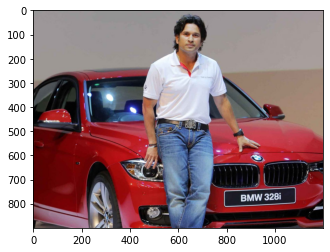

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.55)

In [12]:
print(ClassIndex)
print(confidece)

[[1]
 [3]]
[[0.7457371 ]
 [0.65998435]]


In [13]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    lavel = "{}: {:.2f}%".format(classLabels[ClassInd-1],conf*100)
    cv2.putText(img,lavel,(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness =2)

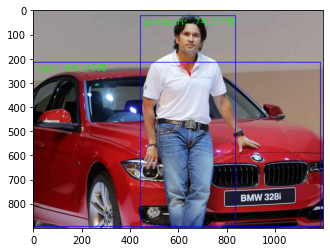

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

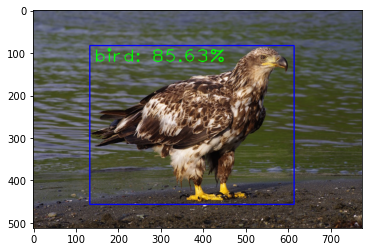

In [15]:
img2 =cv2.imread("eagle.jpg")
plt.imshow(img2)
ClassIndex, confidece, bbox = model.detect(img2,confThreshold=0.55)
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img2,boxes,(255,0,0),2)
    lavel = "{}: {:.2f}%".format(classLabels[ClassInd-2],conf*100)
    cv2.putText(img2,lavel,(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness =2)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [16]:
cap = cv2.VideoCapture("Dhaka_Traffic_Final.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open video")
    
font_scale = 1
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.55)
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                lavel = "{}: {:.2f}%".format(classLabels[ClassInd-1],conf*100)
                cv2.putText(frame,lavel,(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color=(0,255,0), thickness =2)
    cv2.imshow("Object decteded",frame)
    
    if cv2.waitKey(2) & 0xFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows()


[[3]
 [3]
 [2]
 [1]
 [3]
 [1]
 [4]
 [3]
 [1]
 [2]
 [1]
 [1]]
[[2]
 [3]
 [3]
 [1]
 [3]
 [4]
 [1]
 [2]
 [1]
 [3]
 [2]
 [1]]
[[4]
 [3]
 [1]
 [3]
 [1]
 [3]
 [2]
 [1]
 [1]
 [4]
 [2]
 [2]]
[[4]
 [1]
 [3]
 [3]
 [1]
 [4]
 [2]
 [1]
 [3]
 [4]
 [1]]
[[4]
 [1]
 [4]
 [3]
 [1]
 [4]
 [4]
 [1]
 [3]
 [3]
 [2]
 [1]
 [1]
 [4]
 [3]]
[[4]
 [1]
 [1]
 [3]
 [1]
 [3]
 [2]
 [4]
 [3]
 [4]
 [4]]
[[4]
 [3]
 [1]
 [4]
 [1]
 [3]
 [1]
 [3]
 [3]
 [4]
 [1]
 [1]
 [3]]
[[4]
 [1]
 [4]
 [4]
 [1]
 [3]
 [3]
 [4]
 [1]
 [4]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[4]
 [3]
 [4]
 [1]
 [4]
 [2]
 [4]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [1]
 [4]
 [1]
 [1]
 [1]
 [3]
 [4]]
[[4]
 [3]
 [4]
 [2]
 [1]
 [1]
 [1]
 [4]
 [4]
 [4]
 [3]
 [4]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[3]
 [4]
 [4]
 [1]
 [1]
 [1]
 [3]
 [6]
 [2]
 [1]
 [1]
 [1]
 [4]
 [1]
 [1]]
[[4]
 [3]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [3]
 [4]
 [1]
 [4]
 [3]
 [1]
 [4]
 [2]]
[[3]
 [3]
 [4]
 [1]
 [1]
 [4]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [4]
 [4]
 [4]]
[[1]
 [2]
 [3]
 [4]
 [3]
 [1]
 [1]
 [6]
 [4]
 [4]
 [1]
 [

[[1]
 [1]
 [3]
 [1]
 [1]]
[[ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]]
[[1]
 [1]
 [1]
 [3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]]
[[3]
 [1]
 [3]]
[[3]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]]
[[3]
 [1]
 [1]]
[[3]
 [1]]
[[3]
 [1]
 [1]]
[[ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]]
[[3]
 [1]]
[[3]
 [1]
 [1]]
[[3]
 [1]]
[[3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[ 3]
 [ 1]
 [ 1]
 [ 1]
 [ 1]
 [10]]
[[3]
 [1]]
[[1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [1]]
[[1]
 [3]
 [1]
 [1]
 [1]]
[[1]
 [3]]
[[1]
 [3]]
[[1]
 [3]]
[[1]
 [3]
 [1]]
[[1]
 [3]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]]
[[ 3]
 [ 1]
 [10]]
[[ 1]
 [ 3]
 [ 1]
 [10]]
[[3]
 [1]
 [1]]
[[3]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [1]]
[[1]
 [3]
 [3]]
[[1]
 [3]
 [1]
 [1]
 [1]
 [3]
 [1]
 [1]]
[[ 1]
 [ 3]
 [ 1]
 [ 1]
 [10]
 [ 1]
 [ 3]
 [ 1]
 

[[8]
 [1]
 [4]
 [3]
 [1]
 [1]
 [4]
 [1]
 [8]
 [3]
 [3]]
[[8]
 [1]
 [3]
 [4]
 [1]
 [1]
 [1]
 [3]
 [4]
 [8]]
[[8]
 [1]
 [4]
 [4]
 [1]
 [1]
 [3]
 [3]]
[[8]
 [1]
 [4]
 [1]
 [4]
 [1]
 [3]
 [3]
 [2]
 [3]
 [1]]
[[8]
 [1]
 [4]
 [1]
 [2]
 [4]
 [3]
 [1]
 [3]
 [1]
 [1]]
[[8]
 [1]
 [1]
 [3]
 [4]
 [2]
 [2]
 [1]
 [1]
 [1]
 [3]
 [3]
 [2]
 [3]]
[[8]
 [1]
 [2]
 [1]
 [4]
 [3]
 [1]
 [1]
 [1]
 [2]
 [3]]
[[1]
 [8]
 [2]
 [3]
 [1]
 [1]
 [4]
 [3]
 [1]
 [2]
 [1]
 [2]
 [3]]
[[1]
 [8]
 [2]
 [1]
 [4]
 [3]
 [3]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]]
[[1]
 [2]
 [8]
 [1]
 [2]
 [3]
 [3]
 [1]
 [1]
 [4]
 [1]
 [1]]
[[1]
 [2]
 [8]
 [1]
 [3]
 [3]
 [4]
 [1]
 [2]
 [1]
 [2]
 [1]]
[[1]
 [2]
 [8]
 [1]
 [1]
 [4]
 [3]
 [3]
 [1]
 [2]
 [1]]
[[1]
 [2]
 [8]
 [1]
 [1]
 [1]
 [3]
 [2]
 [1]
 [3]
 [2]]
[[1]
 [2]
 [8]
 [1]
 [1]
 [1]
 [2]
 [2]
 [3]
 [1]]
[[1]
 [2]
 [8]
 [1]
 [1]
 [1]
 [3]
 [2]
 [3]
 [2]
 [3]
 [1]]
[[1]
 [2]
 [1]
 [1]
 [1]
 [8]
 [3]
 [2]
 [1]
 [2]
 [3]
 [1]
 [2]]
[[1]
 [2]
 [1]
 [8]
 [1]
 [3]
 [1]
 [4]
 [3]
 [1]]
[[2]
 [8]
 [1]
 [2

[[ 3]
 [ 1]
 [ 3]
 [ 3]
 [ 6]
 [10]
 [ 1]
 [ 3]]
[[ 1]
 [ 3]
 [ 6]
 [ 3]
 [ 3]
 [ 3]
 [10]
 [ 1]]
[[ 1]
 [ 3]
 [ 3]
 [ 6]
 [ 3]
 [ 1]
 [10]]
[[1]
 [6]
 [3]
 [3]
 [3]
 [3]
 [3]
 [1]
 [1]]
[[1]
 [3]
 [6]
 [1]
 [3]]
[[ 1]
 [ 1]
 [ 6]
 [ 3]
 [ 1]
 [ 3]
 [ 3]
 [10]]
[[1]
 [1]
 [1]
 [3]
 [6]
 [1]
 [3]
 [3]
 [1]]
[[1]
 [1]
 [3]
 [6]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [6]
 [3]
 [1]]
[[1]
 [3]
 [3]
 [6]
 [3]
 [1]
 [1]
 [3]]
[[1]
 [3]
 [1]
 [3]
 [6]
 [3]
 [3]
 [1]]
[[1]
 [3]
 [1]
 [1]
 [3]
 [6]
 [3]]
[[ 1]
 [ 3]
 [ 3]
 [ 1]
 [ 1]
 [ 6]
 [10]]
[[1]
 [3]
 [1]
 [3]
 [6]
 [2]
 [6]
 [1]
 [3]
 [1]]
[[1]
 [3]
 [3]
 [1]
 [1]
 [6]
 [3]]
[[1]
 [3]
 [6]
 [3]
 [1]
 [3]]
[[1]
 [3]
 [6]
 [3]
 [1]
 [3]]
[[1]
 [3]
 [3]
 [6]
 [1]
 [2]
 [6]
 [3]]
[[1]
 [3]
 [3]
 [2]
 [6]
 [2]
 [1]
 [1]]
[[1]
 [3]
 [3]
 [2]
 [2]
 [6]
 [1]
 [1]
 [6]
 [2]]
[[1]
 [3]
 [3]
 [2]
 [2]
 [6]
 [1]
 [1]]
[[3]
 [1]
 [3]
 [2]
 [1]
 [6]
 [4]
 [6]
 [2]]
[[1]
 [3]
 [3]
 [6]
 [2]
 [1]
 [1]
 [6]
 [1]]
[[1]
 [3]
 [6]
 [3]
 [2]
 [1]
 [2]
 [1]]
[[1]
 [3]
 [2

[[2]
 [6]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [1]]
[[2]
 [6]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]]
[[1]
 [6]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]]
[[1]
 [6]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]]
[[6]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [2]]
[[6]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]]
[[6]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]]
[[6]
 [1]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
[[6]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]]
[[6]
 [1]
 [1]
 [2]
 [1]]
[[6]
 [1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]]
[[6]
 [1]
 [2]
 [1]
 [2]]
[[1]
 [6]
 [2]
 [2]]
[[6]
 [2]
 [2]
 [1]
 [1]]
[[6]
 [2]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]]
[[1]
 [6]
 [2]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [1]]
[[1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [1]
 [6]]
[[1]
 [2]
 [2]
 [2]
 [2]
 [1]]
[[1]
 [2]
 [2]
 [2]
 [1]
 [1]]
[[1]
 [1]
 [2]
 [2]
 [2]
 [2]]
[[1]
 [2]
 [2]]
[[1]
 [2]
 [2]
 [1]
 [2]
 [2]]
[[1]
 [2]
 [2]
 [2]
 [1]]
[[1]
 